<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [28]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs, make_circles # Creación de datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación
from sklearn.neighbors import KNeighborsClassifier
# Algoritmo SVC
from sklearn.svm import SVC


---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [4]:
url = "https://raw.githubusercontent.com/Evelyn0924/Aprendizaje-Automatico-CD/main/Datos/HeartDiseaseTrain-Test.csv"

df = pd.read_csv(url, sep=';')
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [6]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [8]:

y = df["target"]
X = df.drop(columns=["target"])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=49, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


In [9]:
# Valores de kernel (igual que en el notebook guía)
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

# Precisión de los modelos
precisions_test = []
precisions_train = []

for kernel in kernel_values:
    modelo = SVC(kernel=kernel, random_state=49)
    modelo.fit(X_train_scaled, y_train)

    y_pred_test = modelo.predict(X_test_scaled)
    y_pred_train = modelo.predict(X_train_scaled)

    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

    print(f"Kernel: {kernel} | Train: {precisions_train[-1]:.4f} | Test: {precisions_test[-1]:.4f}")

Kernel: linear | Train: 0.8890 | Test: 0.8439
Kernel: poly | Train: 0.9646 | Test: 0.9512
Kernel: rbf | Train: 0.9622 | Test: 0.9268
Kernel: sigmoid | Train: 0.8171 | Test: 0.7756


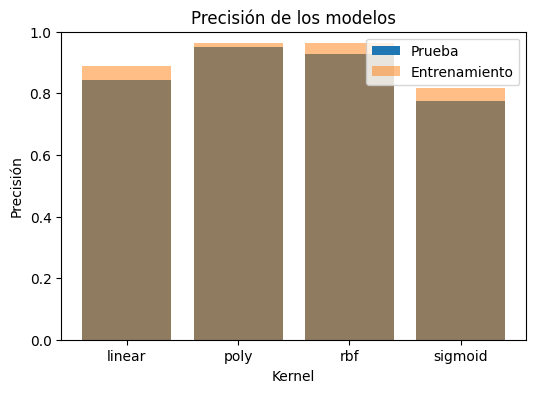

In [10]:
plt.figure(figsize=(6, 4))
plt.bar(kernel_values, precisions_test)
plt.bar(kernel_values, precisions_train, alpha=0.5)
plt.title('Precisión de los modelos')
plt.xlabel('Kernel')
plt.ylabel('Precisión')
plt.legend(['Prueba', 'Entrenamiento'])
plt.ylim(0, 1)
plt.show()

Se evaluaron distintos kernels del modelo SVM (lineal, polinómico, RBF y sigmoide), comparando su precisión en los conjuntos de entrenamiento y prueba.
A partir de la gráfica de comparación, se observó que el kernel RBF obtuvo la mayor precisión en el conjunto de prueba, superando a los demás kernels.
Por esta razón, se seleccionó el kernel RBF como el mejor para el modelo SVM en este problema de clasificación.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [19]:
# Entrenar el modelo con el kernel seleccionado
modelo = SVC(kernel='rbf', random_state=49)
modelo.fit(X_train_scaled, y_train)
y_pred = modelo.predict(X_test_scaled)
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.93
Matriz de confusión:
[[ 90  10]
 [  5 100]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       100
           1       0.91      0.95      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



El modelo SVM fue entrenado utilizando el kernel RBF, seleccionado previamente por presentar el mejor desempeño.
Al evaluar el modelo en el conjunto de prueba, se obtuvo una precisión del 93%, lo que indica un alto nivel de exactitud.
La matriz de confusión y el reporte de clasificación muestran un buen balance entre precisión y recall para ambas clases, confirmando que el modelo generaliza adecuadamente

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

In [29]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train_scaled, y_train)
y_pred_knn = modelo_knn.predict(X_test_scaled)

accuracy_knn = round(accuracy_score(y_test, y_pred_knn), 2)
print("Precisión del modelo kNN:", accuracy_knn)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Matriz de confusión kNN:")
print(cm_knn)

print("Reporte de clasificación kNN:")
print(classification_report(y_test, y_pred_knn))

Precisión del modelo kNN: 0.86
Matriz de confusión kNN:
[[86 14]
 [14 91]]
Reporte de clasificación kNN:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       100
           1       0.87      0.87      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



Se comparó el modelo SVM con el algoritmo k-Nearest Neighbors (kNN), ambos de aprendizaje supervisado.
Los modelos fueron entrenados y evaluados utilizando el mismo conjunto de datos y la misma partición de entrenamiento y prueba.
El modelo SVM con kernel RBF obtuvo una precisión del 93%, superando al modelo kNN, que alcanzó una precisión del 86%.
Estos resultados indican que SVM presenta una mejor capacidad para capturar relaciones no lineales en los datos, mientras que kNN, aunque efectivo, es más sensible a la distribución de los datos y al número de vecinos seleccionados.